# 💡 支持向量机（SVM, Support Vector Machine）

---

## 📌 1. 简介

SVM 是一个强大的分类与回归模型，尤其适用于中小数据集。其核心思想是**寻找一个最优超平面**，最大化类别之间的间隔（margin）。

---

## 🧠 2. 基本思想

- 目标是找到一个超平面，使得两类样本间的“间隔”最大。
- 分类边界由“支持向量”决定，即最接近边界的点。
- 可通过“核函数”将样本映射到高维空间，解决非线性分类问题。

---

## 📐 3. 线性可分的 Hard Margin SVM

### 优化目标：
$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2 \quad
\text{s.t. } y^{(i)} (\mathbf{w}^\top \mathbf{x}^{(i)} + b) \geq 1
$$

---

## 🧊 4. Soft Margin SVM（允许错误分类）

引入松弛变量 $\xi_i$ 和惩罚系数 $C$：

$$
\min_{\mathbf{w}, b, \xi} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_i \xi_i \\
\text{s.t. } y_i (\mathbf{w}^\top x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

- $C$ 控制对误分类的容忍度，C 越大容错越低。

---

## 🎯 5. 核函数（Kernel Trick）

SVM 可通过核函数处理非线性问题，将数据隐式映射到高维空间：

| 核函数类型     | 特点                          |
|----------------|-------------------------------|
| 线性核         | 适用于线性可分数据             |
| 多项式核       | 建模多项式关系，适合中小样本   |
| RBF（高斯核）  | 非线性建模能力强，广泛使用     |
| Sigmoid核      | 类似神经网络激活函数（较少用） |

---

### ✅ 核函数表达式公式

- 线性核：
  $$
  K(x, x') = x^\top x'
  $$

- 多项式核：
  $$
  K(x, x') = (x^\top x' + 1)^d
  $$

- RBF（高斯核）：
  $$
  K(x, x') = \exp\left(-\gamma \left\| x - x' \right\|^2 \right)
  $$

- Sigmoid 核：
  $$
  K(x, x') = \tanh(\alpha x^\top x' + c)
  $$


---

## ⚙️ 6. 常用参数解释（`sklearn.svm.SVC`）

- `C`: 误差惩罚项，越大越“严格”
- `kernel`: 选择核函数（常用 'linear', 'rbf'）
- `gamma`: 核函数中的超参数（高斯核宽度）
- `probability=True`: 开启概率输出（用于绘制 ROC）

---

## ✅ 7. 优点与缺点

| 优点                                  | 缺点                                 |
|---------------------------------------|--------------------------------------|
| 分类性能强，尤其在 margin 较大时       | 对大数据不友好，训练慢               |
| 支持非线性映射（核技巧）              | 对参数敏感，需调参                   |
| 不容易过拟合，结构风险最小化           | 不适用于噪声大、重叠样本多的任务      |
| 有良好的几何解释和泛化能力             | 难以解释模型，不适合概率输出任务      |

---

## 🧠 常见面试问题

### Q1: 为什么 SVM 可以解决非线性问题？
- 因为使用核函数将数据隐式映射到高维空间，使数据线性可分。

### Q2: SVM 和 Logistic Regression 有什么区别？
- SVM 最大化 margin，重点是分类边界；Logistic 回归最大化概率。
- SVM 是结构风险最小化，LR 是经验风险最小化。
- SVM 对异常值更敏感（硬间隔）。

### Q3: SVM 中的 C 和 gamma 有什么作用？
- `C`: 控制误分类惩罚，越大越严格。
- `gamma`: 控制核函数的“影响范围”，越大越过拟合，越小越欠拟合。

### Q4: 什么是支持向量？
- 是靠近分类边界的样本点，它们决定了超平面的具体位置。

---



# ✍️ 手撕 SVM 面试模板（Hard / Soft Margin 推导 + 对偶）

---

## ✅ 一、线性可分 SVM（Hard Margin）

我们希望找到一个超平面：

$$
f(x) = \mathbf{w}^\top x + b
$$

满足所有样本的分类正确，并且间隔最大：

$$
\min_{\mathbf{w}, b} \quad \frac{1}{2} \|\mathbf{w}\|^2 \\
\text{subject to } y_i (\mathbf{w}^\top x_i + b) \geq 1, \quad \forall i
$$

这是经典的 **凸二次规划问题**。

---

## ✅ 二、线性不可分 SVM（Soft Margin）

为了允许部分样本被错误分类，引入松弛变量 $( \xi_i $)：

$$
\min_{\mathbf{w}, b, \xi} \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i \\
\text{subject to } \quad y_i (\mathbf{w}^\top x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

- $( \xi_i $)：表示第 $( i $) 个样本的违约程度
- $( C $)：控制对误分类的容忍程度（越大越“严格”）

---

## ✅ 三、对偶形式（Lagrangian 推导）

构造拉格朗日函数：

$$
L(\mathbf{w}, b, \alpha) = \frac{1}{2} \|\mathbf{w}\|^2 - \sum_{i=1}^{n} \alpha_i [y_i (\mathbf{w}^\top x_i + b) - 1]
$$

对 $( \mathbf{w}, b $) 求偏导并代入消掉，得到对偶问题：

$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j x_i^\top x_j \\
\text{subject to } \alpha_i \geq 0, \quad \sum_i \alpha_i y_i = 0
$$

---

## ✅ 四、决策函数（最终模型）

$$
f(x) = \text{sign}\left( \sum_{i=1}^{n} \alpha_i y_i K(x_i, x) + b \right)
$$

- $( K(x_i, x) $)：核函数（例如 RBF）
- 只有对应 $( \alpha_i > 0 $) 的 $( x_i $) 是**支持向量**


In [3]:
import matplotlib.pyplot as plt
from data_pipeline import load_bank_data, build_pipeline, evaluate_model
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

 Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       801
           1       0.59      0.25      0.35       104

    accuracy                           0.89       905
   macro avg       0.75      0.61      0.65       905
weighted avg       0.87      0.89      0.87       905

 Confusion Matrix:
 [[783  18]
 [ 78  26]]
 Accuracy: 0.8939


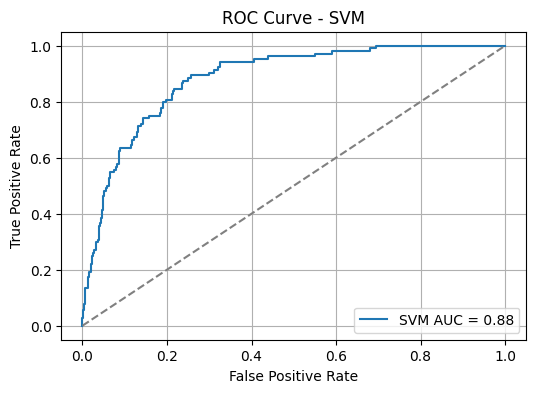

In [5]:
# 加载数据
X, y, categorical_cols, numerical_cols = load_bank_data('bank.csv')

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

svm_rbf_model = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",     # 默认推荐（自动根据 1/n_features）
    probability=True,  # 开启概率输出以便绘制 ROC
    random_state=42
)

# 构建 Pipeline
pipeline = build_pipeline(numerical_cols, categorical_cols, svm_rbf_model)

# 模型训练与评估
pipeline.fit(X_train, y_train)
evaluate_model(pipeline, X_test, y_test, model_name="SVM")